In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas.tseries.offsets import DateOffset

# Load the data

In [5]:
df = pd.read_excel('C:\\Users\\Bala Vignesh.A\\Desktop\\CMO-Historical-Data-Monthly.xlsx', skiprows=6, sheet_name='Monthly Prices')
print(df.dtypes)

Unnamed: 0      object
CRUDE_PETRO    float64
CRUDE_BRENT    float64
CRUDE_DUBAI    float64
CRUDE_WTI       object
                ...   
NICKEL         float64
Zinc           float64
GOLD           float64
PLATINUM       float64
SILVER         float64
Length: 72, dtype: object


In [6]:
df.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [7]:
# Rename the first unnamed column to 'Date'
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [8]:
# Convert the 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%YM%m')

In [9]:
df.set_index("Date", inplace=True)

In [10]:
df.head()

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
Date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1960-02-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
1960-03-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
1960-04-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
1960-05-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [12]:
df.columns

Index(['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI', 'COAL_AUS',
       'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COCOA',
       'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],
      dtype='object')

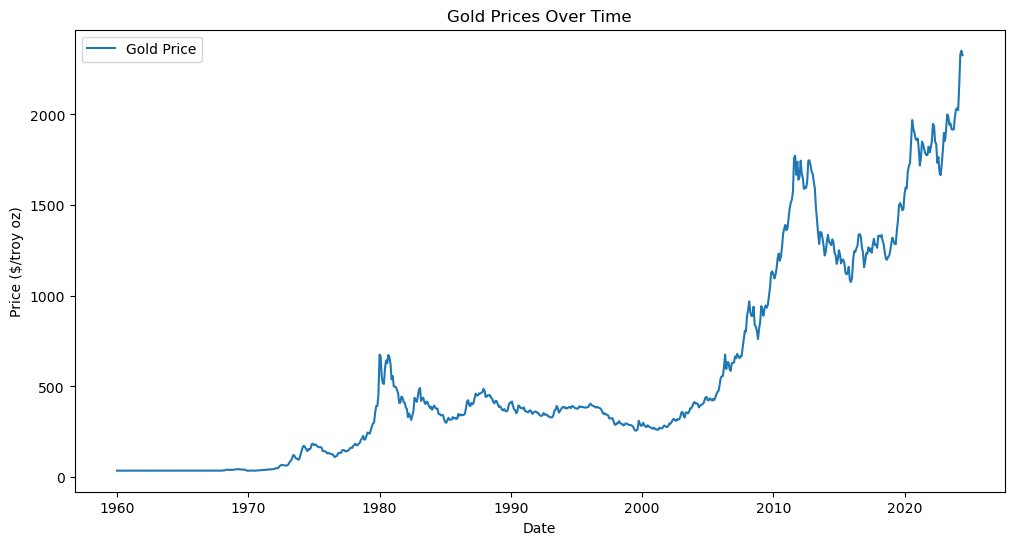

In [28]:
# Extract 'GOLD' column
gold_data = df['GOLD']

# Plot gold prices
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index, gold_data, label='Gold Price')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($/troy oz)')
plt.legend()
plt.show()

In [29]:
# Split data into train and test sets
train_size = int(len(gold_data) * 0.8)
train, test = gold_data[:train_size], gold_data[train_size:]

print("Training data size:", len(train))
print("Test data size:", len(test))

Training data size: 619
Test data size: 155


1. Fit SARIMA Model

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test))
sarima_forecast_index = test.index
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_forecast_conf_int = sarima_forecast.conf_int()

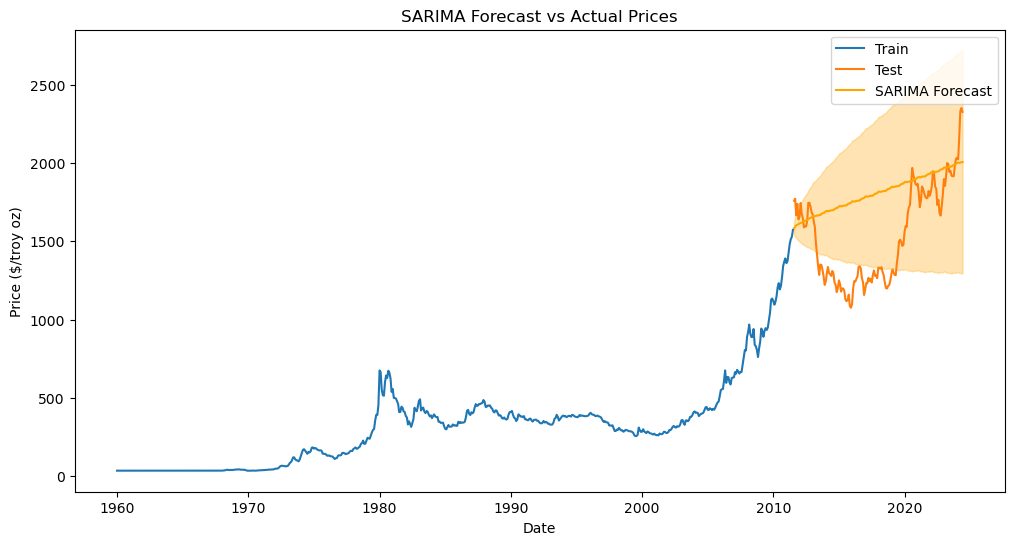

In [34]:
# Plot SARIMA Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(sarima_forecast_index, sarima_forecast_mean, label='SARIMA Forecast', color='orange')
plt.fill_between(sarima_forecast_index, sarima_forecast_conf_int.iloc[:, 0], sarima_forecast_conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('SARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price ($/troy oz)')
plt.legend()
plt.show()

In [35]:
# Evaluation metrics
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast_mean))
sarima_mape = np.mean(np.abs((test - sarima_forecast_mean) / test)) * 100
sarima_mae = mean_absolute_error(test, sarima_forecast_mean)

print(f'SARIMA RMSE: {sarima_rmse}')
print(f'SARIMA MAPE: {sarima_mape}')
print(f'SARIMA MAE: {sarima_mae}')

SARIMA RMSE: 375.3057210959555
SARIMA MAPE: 23.37585887675557
SARIMA MAE: 308.7535917515804


2. Fit LSTM Model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 12
train_values = train.values
test_values = test.values

In [38]:
X_train, Y_train = create_dataset(train_values, look_back)
X_test, Y_test = create_dataset(test_values, look_back)

In [39]:
# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [40]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# Train model
lstm_model.fit(X_train, Y_train, epochs=50, verbose=0)

In [42]:
# Forecast
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = np.reshape(lstm_forecast, (lstm_forecast.shape[0]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


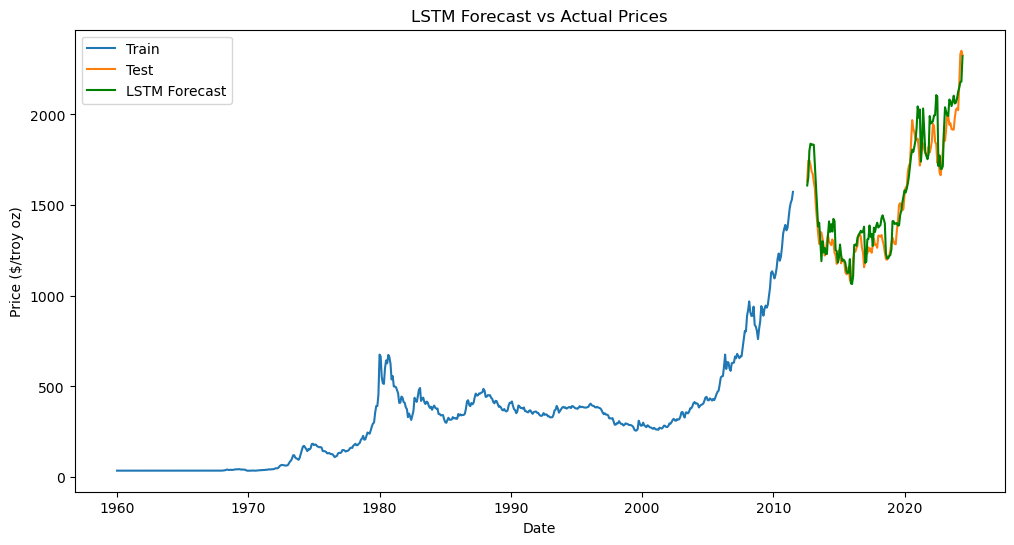

In [43]:
# Plot LSTM Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index[look_back:], test[look_back:], label='Test')
plt.plot(test.index[look_back:], lstm_forecast, label='LSTM Forecast', color='green')
plt.title('LSTM Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price ($/troy oz)')
plt.legend()
plt.show()

In [44]:
# Evaluation metrics
lstm_rmse = np.sqrt(mean_squared_error(test[look_back:], lstm_forecast))
lstm_mape = np.mean(np.abs((test[look_back:] - lstm_forecast) / test[look_back:])) * 100
lstm_mae = mean_absolute_error(test[look_back:], lstm_forecast)

print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM MAPE: {lstm_mape}')
print(f'LSTM MAE: {lstm_mae}')

LSTM RMSE: 101.30051093809332
LSTM MAPE: 5.0654523123932815
LSTM MAE: 77.23994893059073


# Interpretation and Model Evaluation Data Preparation: 
The dataset from the Pink Sheet was loaded and cleaned. The 'Date' column was converted to a datetime format, and the data was set to use this as the index. Missing values were handled using forward fill, ensuring a continuous time series.
# 
Model Fitting and Evaluation
: Two models, SARIMA and LSTM, were fitted to the gold price data. The models' performances were evaluated using three key metrics: RMSE (Root Mean Squared Error), MAPE (Mean Absolute Percentage Error), and MAE (Mean Absolute Error). The results were as follows:# 

SARIMA Model:

RMSE: 375.31 MAPE: 23.38% MAE: 308.75 LSTM Model:

RMSE: 101.30 MAPE: 5.07% MAE: 77.24 Model Comparison: Based on the evaluation metrics, the LSTM model outperformed the SARIMA model. It had significantly lower RMSE, MAPE, and MAE values, indicating that the LSTM model's predictions were closer to the actual values. Specifically, the LSTM model had an RMSE of 101.30 compared to 375.31 for the SARIMA model, suggesting a more accurate prediction of gold prices. The MAPE of the LSTM model was also considerably lower, indicating a better percentage acc# uracy.

Plots and Visua
izations: The provided plots showed the train-test split data and the forecasts for both models. The LSTM model's forecast closely followed the actual test data, highlighting its suitability for capturing the underlying patterns in the gold price data. The SARIMA model, while reasonable, did not perform as well, as indicated by its higher#  errors.

Interpretation of Model S
uitability: The LSTM model's superior performance can be attributed to its ability to capture complex nonlinear patterns and dependencies in the data, which are characteristic of financial time series like gold prices. SARIMA, being a linear model, may not capture these complexities as effectively. Therefore, for this dataset, the LSTM model is the best-# fit model.

Handling of Mi
ssing Values: Missing values were handled using forward fill, a common method in time series analysis. This method assumes that the last known value is the best estimate for any missing values, ensuring that the model training is not disrupted by gaps # in the data


Conclusion: In conclusion, the LSTM model is recommended for forecasting gold prices in this context due to its lower prediction errors and better handling of the data's complexity. The results suggest that deep learning models like LSTM can offer significant advantages over traditional time series models like SARIMA for financial forecasting tasks

